# Домашнее задание №3

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [175]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [176]:
len(data)

583

Колонки:
Age of the patient - Возраст пациента;
Gender of the patient - Пол пациента;
Total Bilirubin - Общий билирубин;
Direct Bilirubin - Прямой билирубин;
Alkaline Phosphotase - Щелочная фосфотаза;
Alamine Aminotransferase - Аламино-аминотрансфераза;
Aspartate Aminotransferase - Аспартат аминотрансфераза;
Total Protiens - Всего Protiens;
Albumin - Альбумин;
Albumin_and_Globulin_Ratio - Соотношение альбумина и глобулина;
Dataset: field used to split the data into two sets (patient with liver disease, or no disease) - Набор данных: поле, используемое для разделения данных на два набора (пациент с заболеванием печени или без заболевания).

Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [24]:
# Сперва разделим отсортируем все значения по параметру Total_Bilirubin 

data.sort_values(by=['Total_Bilirubin'], inplace=True)
# без 'Gender',
X = data[['Age','Total_Bilirubin',
          'Direct_Bilirubin','Alkaline_Phosphotase',
          'Alamine_Aminotransferase','Aspartate_Aminotransferase',
          'Total_Protiens','Albumin',
          'Albumin_and_Globulin_Ratio','Dataset']]
direct_bilirubin = data[['Direct_Bilirubin']]


In [111]:
#  разделим датасет на тренировочные и тестовые данные (80% на 20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    direct_bilirubin,
    test_size = 0.2,    
    random_state = 42
)
print('y_train = direct_bilirubin')
print(len(X_train), len(y_train))
print('y_test = direct_bilirubin')
print(len(X_test), len(y_test))
print('общий объем данных в data',len(data))
X_test.head()

y_train = direct_bilirubin
466 466
y_test = direct_bilirubin
117 117
общий объем данных в data 583


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
533,46,1.4,0.4,298,509,623,3.6,1.0,0.30,1
277,60,2.0,0.8,190,45,40,6.0,2.8,0.80,1
542,62,0.7,0.2,173,46,47,7.3,4.1,1.20,2
163,39,1.9,0.9,180,42,62,7.4,4.3,1.38,1
213,8,0.9,0.2,401,25,58,7.5,3.4,0.80,1


In [61]:
# Из полученных тренировочных и тестовых данных мы используем только один атрибут - Total_Bilirubin
X_train_lstat = X_train[['Total_Bilirubin']]
X_test_lstat = X_test[['Total_Bilirubin']]

In [62]:
#  Сделаем reshape(-1, 1) как того требует модель
X_train_lstat = np.array(X_train_lstat).reshape(-1, 1)
X_test_lstat = np.array(X_test_lstat).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [63]:
#  Подгрузим модель
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [72]:
#  Обучим модель линейной регрессии: y_train = F(X_train_lstat = Total_Bilirubin)
model.fit(X_train_lstat, y_train)
print('для модели  - y = ax + b; a =',model.coef_, ';    b =',model.intercept_)

для модели  - y = ax + b; a = [[0.36959691]] ;    b = [0.25754955]


In [48]:
#   Посмотрим ошибку модели
model.score(X_test_lstat, y_test)

0.8925882365526756

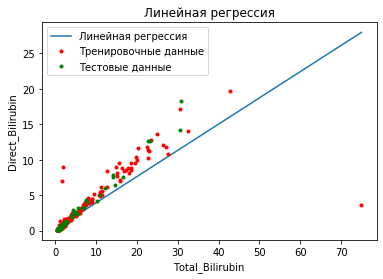

In [49]:
#  Всего 89 % верно предсказанных
#  Построим рисунок

plt.xlabel('Total_Bilirubin')
plt.ylabel('Direct_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(X_train_lstat), max(X_train_lstat), 100)
y = (model.coef_*x + model.intercept_)
plt.plot(x,y)                         # это линия регрессии помодели: y = model.coef_*x + model.intercept_
plt.plot(X_train_lstat, y_train, 'r.')# тренировочные данные
plt.plot(X_test_lstat, y_test, 'g.')  # проверочные данные
plt.legend(['Линейная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()


Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

In [50]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)#  задаем степень полинома для модели одномерной полиномиальной регрессии
X_poly = poly_reg.fit_transform(X_train_lstat) # преобразовываю данные для модели одномерной полиномиальной регрессии
pol_reg = LinearRegression() #  подгужаем модель
pol_reg.fit(X_poly, y_train) #  обучение модели  одномерной полиномиальной регрессии
pol_reg.score(poly_reg.fit_transform(X_test_lstat), y_test) # расчет точности модели  

0.9575668756555745

In [51]:
# Полиномиальная регрессия степени 2 на 6% лучше (для этих данных)

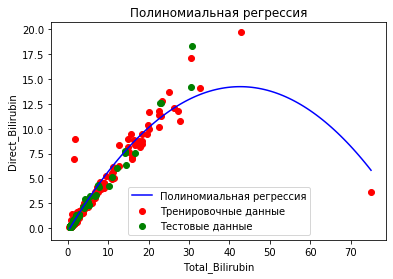

In [80]:
def viz_polymonial():
    plt.scatter(X_train_lstat, y_train, c='red')            # тренировочные данные
    plt.scatter(X_test_lstat, y_test, c='green')            # проверочные данные
    x = np.linspace(min(X_test_lstat), max(X_train_lstat), 100)
    y = pol_reg.predict(poly_reg.fit_transform(x))          # это сама модель одномерной полиномиальной регрессии
    plt.plot(x, y, 'b')
    plt.title('Полиномиальная регрессия')
    plt.xlabel('Total_Bilirubin')
    plt.ylabel('Direct_Bilirubin')
    plt.legend(['Полиномиальная регрессия','Тренировочные данные', 'Тестовые данные'])
    plt.show()
    return
viz_polymonial()

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

In [177]:
# увидели, что в столбце Albumin_and_Globulin_Ratio имеется значения NaN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [178]:
# строки в которых отсутствуют значения параметра - Albumin_and_Globulin_Ratio

data.loc[data['Albumin_and_Globulin_Ratio'].isnull() == True]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [179]:
# удалим эти строки из data
data = data.loc[data['Albumin_and_Globulin_Ratio'].isnull() != True,:]

In [180]:
# объем данных стал на 4 строчки меньше
len(data)

579

In [196]:
# Разделим таблицу на предсказываемые и независимые данные
# подготовка данных - берем все данные кроме  str и 'Dataset' (X = data.drop('Dataset', axis=1))
X = data[['Age','Total_Bilirubin',
          'Direct_Bilirubin','Alkaline_Phosphotase',
          'Alamine_Aminotransferase','Aspartate_Aminotransferase',
          'Total_Protiens','Albumin',
          'Albumin_and_Globulin_Ratio']]
y = data.Dataset

In [199]:
from sklearn.linear_model import LogisticRegression
# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [200]:
# Обучим модель логистической регрессии
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [201]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.76      0.84      0.80        85
           2       0.39      0.29      0.33        31

    accuracy                           0.69       116
   macro avg       0.58      0.56      0.57       116
weighted avg       0.66      0.69      0.67       116



 проверим с помощью кросс-валидации

In [203]:
# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.64      0.97      0.77        73
           2       0.60      0.07      0.12        43

    accuracy                           0.64       116
   macro avg       0.62      0.52      0.45       116
weighted avg       0.62      0.64      0.53       116



результаты, похоже, не очень; (точность чуть упала. а полнота увеличилась значительно.)
попробуем оставить в данных те ряды, которые наиболее значимы для Dataset

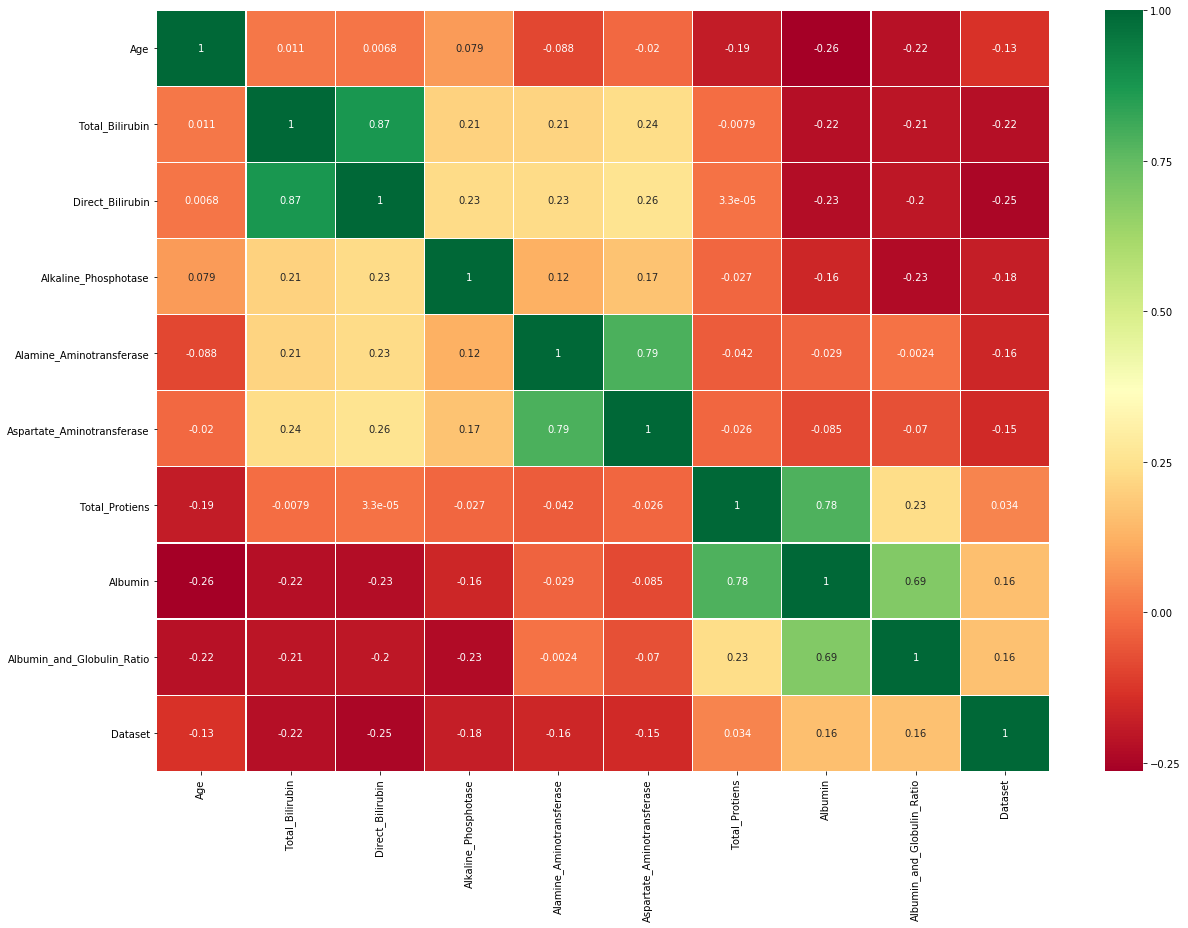

In [205]:
import seaborn as sns

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20,14)
plt.show()

оставим для анализа 
Total_Bilirubin (-0.22)
Direct_Bilirubin (-0.25)
Alkaline_Phosphotase (-0.18)

In [213]:
X = data[['Total_Bilirubin',
          'Direct_Bilirubin',
         'Alkaline_Phosphotase' ]]
y = data.Dataset

In [214]:
# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [215]:
# Обучим модель логистической регрессии
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [216]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.73      0.99      0.84        85
           2       0.00      0.00      0.00        31

    accuracy                           0.72       116
   macro avg       0.37      0.49      0.42       116
weighted avg       0.54      0.72      0.62       116



Да, полнота и точность увеличились. Для Dataset=1, 

Посчитать квартили для всех колонок. 

In [116]:
# статистические характеристики для всех колонок
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


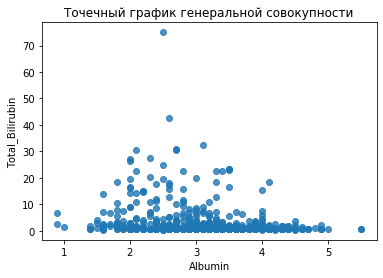

In [227]:
# Точечный график генеральной совокупности
Albumin = data['Albumin']
Total_Bilirubin = data['Total_Bilirubin']
sns.regplot(x= Albumin, y=Total_Bilirubin,data=data, fit_reg=False)
plt.xlabel('Albumin')
plt.ylabel('Total_Bilirubin')
plt.title('Точечный график генеральной совокупности')
plt.show()

Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

Dataset: пациент  с болезнью печени - 1, пациент не болеет - 2

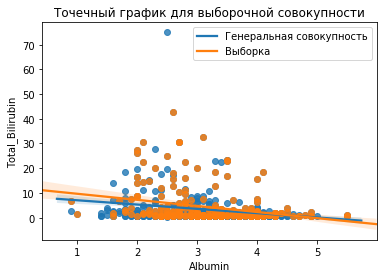

In [239]:
# пациент  с болезнью печени (возраст < 50 лет)

data1 = data[data['Dataset']==1]
Albumin_small = data1[data1['Age']<50]['Albumin']
Total_Bilirubin_small1 = data1[data1['Age']<50]['Total_Bilirubin']
sns.regplot(x= Albumin, y=Total_Bilirubin,data=data1, fit_reg=True)
sns.regplot(x= Albumin_small, y=Total_Bilirubin_small1,data=data, fit_reg=True)
plt.xlabel('Albumin')
plt.ylabel('Total_Bilirubin')
plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('Точечный график для выборочной совокупности')
plt.show()

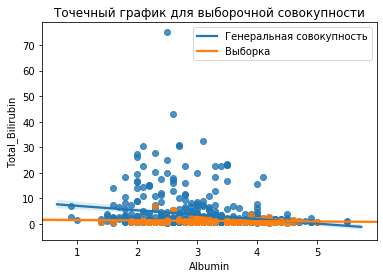

In [240]:
# здоровые пациенты (возраст < 50 лет)

data11 = data[data['Dataset']==2]
Albumin_small = data11[data11['Age']<50]['Albumin']
Total_Bilirubin_small11 = data11[data11['Age']<50]['Total_Bilirubin']
sns.regplot(x= Albumin, y=Total_Bilirubin,data=data1, fit_reg=True)
sns.regplot(x= Albumin_small, y=Total_Bilirubin_small11,data=data, fit_reg=True)
plt.xlabel('Albumin')
plt.ylabel('Total_Bilirubin')
plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('Точечный график для выборочной совокупности')
plt.show()

По графикам можно заметить, что если мы будем рассматривать выборку людей с возрастом  меньше 50 лет, то статистические формулы о генеральной совокупности будут верны, так как выборка более-менее презентативна (особенно для пациентов с болезнью печени)

Сравним показатели Total_Bilirubin больных (1) и здоровых людей (11) (возраст < 50)

In [241]:
stats.ttest_ind(Total_Bilirubin_small1, Total_Bilirubin_small11)

Ttest_indResult(statistic=4.6021230969242595, pvalue=5.868328161171109e-06)

t-value равно 4,6 и p-value меньше 0.05, значит, группы статистически отличаются (понятно почему - у пациентов  с болезнью печени Total_Bilirubin всегда выше)

Плотность вероятности распределения Total_Bilirubin также различны для больных и здоровых:

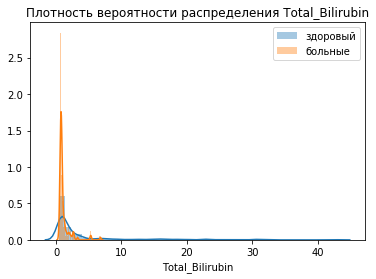

In [242]:
sns.distplot(Total_Bilirubin_small1)
sns.distplot(Total_Bilirubin_small11)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['здоровый', 'больные'])
plt.show()

In [244]:
#  статистические характеристики параметров для пациентов возрастом до 50 лет
# больные пациенты
print(len(Total_Bilirubin_small1))
Total_Bilirubin_small1.describe()

240


count    240.00000
mean       4.19625
std        6.93835
min        0.50000
25%        0.80000
50%        1.25000
75%        3.50000
max       42.80000
Name: Total_Bilirubin, dtype: float64

In [245]:
# здоровые пациенты
print(len(Total_Bilirubin_small11))
Total_Bilirubin_small11.describe()

110


count    110.000000
mean       1.136364
std        0.950203
min        0.500000
25%        0.700000
50%        0.800000
75%        1.075000
max        6.800000
Name: Total_Bilirubin, dtype: float64

среднее значение и квартиль 0.5 в данных выборка сущуственно отличаются -  у больного пациента завышены
среднее в 4 раза, а  квантиль 0.5 почти в два раза

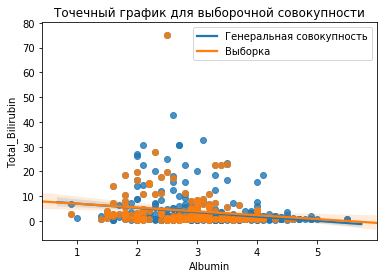

In [246]:
# пациент  с болезнью печени (возраст >= 50 лет)

data2 = data[data['Dataset']==1]
Albumin_small = data2[data2['Age']>=50]['Albumin']
Total_Bilirubin_small2 = data2[data2['Age']>=50]['Total_Bilirubin']
sns.regplot(x= Albumin, y=Total_Bilirubin,data=data1, fit_reg=True)
sns.regplot(x= Albumin_small, y=Total_Bilirubin_small2,data=data, fit_reg=True)
plt.xlabel('Albumin')
plt.ylabel('Total_Bilirubin')
plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('Точечный график для выборочной совокупности')
plt.show()

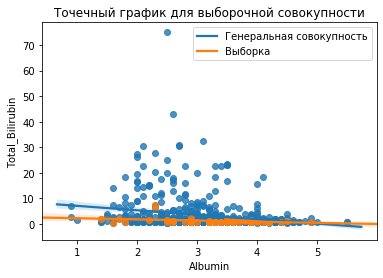

In [248]:
# здоровые пациенты (возраст >= 50 лет)

data22 = data[data['Dataset']==2]
Albumin_small = data22[data22['Age']>=50]['Albumin']
Total_Bilirubin_small22= data22[data22['Age']>=50]['Total_Bilirubin']
sns.regplot(x= Albumin, y=Total_Bilirubin,data=data2, fit_reg=True)
sns.regplot(x= Albumin_small, y=Total_Bilirubin_small22,data=data, fit_reg=True)
plt.xlabel('Albumin')
plt.ylabel('Total_Bilirubin')
plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('Точечный график для выборочной совокупности')
plt.show()

Для выборки людей с возрастом  больше  50 лет - статистические формулы о генеральной совокупности будут верны, так как выборка более-менее презентативна (особенно для пациентов с болезнью печени - линейная зависимость в генеральной совокупности полностью повторяется в выборке)

 Сравним показатели Total_Bilirubin больных (2) и здоровых людей (22) (возраст >=50):

In [249]:
stats.ttest_ind(Total_Bilirubin_small2, Total_Bilirubin_small22)

Ttest_indResult(statistic=2.9596543143179397, pvalue=0.0034063770175977045)

t-value равно 2.95965 и p-value меньше 0.05, значит, группы статистически отличаются 

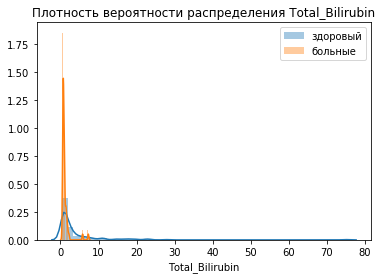

In [250]:
sns.distplot(Total_Bilirubin_small2)
sns.distplot(Total_Bilirubin_small22)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['здоровый', 'больные'])
plt.show()

In [251]:
#  статистические характеристики параметров для пациентов возрастом после 50 лет
# больные пациенты
print(len(Total_Bilirubin_small2))
Total_Bilirubin_small2.describe()

174


count    174.000000
mean       4.158621
std        7.471457
min        0.400000
25%        0.800000
50%        1.700000
75%        4.000000
max       75.000000
Name: Total_Bilirubin, dtype: float64

In [252]:
# здоровые пациенты
print(len(Total_Bilirubin_small22))
Total_Bilirubin_small22.describe()

55


count    55.000000
mean      1.161818
std       1.128173
min       0.500000
25%       0.700000
50%       0.800000
75%       1.100000
max       7.300000
Name: Total_Bilirubin, dtype: float64

среднее значение и квартиль 0.5 в данных выборка также сущуственно отличаются 


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

Одновыборочный t-критерий:
T-test используют для определения, насколько среднее исследуемых данных статистически отличается от среднего значения генеральной совокупности

In [254]:
d1tb = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(d1tb, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.4588588880494733, pvalue=0.014347239706774866)

p-value равно 0.01, что меньше стандартной альфа ошибки 0.05, поэтому мы не принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между Total_Bilirubin и генеральной совокупности в целом.

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

Двухвыборочный t-критерий для независимых выборок:
t-значение - это вероятность того, что различия между выборками также означают разные значения в выборках. Чем выше t, тем более различны группы между собой. Чем меньше t, тем более похожи группы и результаты повторятся

In [255]:
d1 = data[data['Dataset']==1]['Total_Bilirubin']
d2 = data[data['Dataset']==2]['Total_Bilirubin']
stats.ttest_ind(d1, d2)

Ttest_indResult(statistic=5.422946004172417, pvalue=8.632557516910643e-08)

T-значение 5.4 достаточно высокое, p-value равно 10e-8, что намного меньше стандартной альфа ошибки 0.05, поэтому мы не принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между Total_Bilirubin у больных и здоровых.

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

Множественный тест (ANOVA)

In [260]:
q_0 = data[data['Age']<=30]['Dataset']
q_1 = data[data['Age']<=55]['Dataset']
q_2 = data[data['Age']>55]['Dataset']
stats.f_oneway(q_0, q_1, q_2)

F_onewayResult(statistic=5.6485217314482625, pvalue=0.0036875977805328)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп с разным возрастом. Действительно логичный вывод - разные возрастные группы отличаются по здоровью.

Вопросы задавать на почту yustiks@gmail.com